# Lab 4

April 27, 2023

## Autorzy
- Mateusz Łopaciński
- Mateusz Mazur

## Przygotowanie danych
### Wczytanie danych
W pierwszej kolejności wczytamy dane ze zbiorów danych, na których będziemy pracować.

In [1]:
import pandas as pd
import numpy as np
column_names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","class"]
adult_df = pd.read_csv('dataset/adult-all.csv', header=None,names=column_names)

Zobaczmy, czy dane zostały prawidłowo wczytane (czy zgadzają się typy danych)

In [2]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Sprawdźmy również kilka początkowych wartości z obu zbiorów

### Usunięcie brakujących danych.

In [3]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Aby sprawdzić liczbę brakujących wartości zastępujemy "?" nullami.

In [4]:
adult_df.replace('?', np.nan, inplace=True)
adult_df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

<AxesSubplot: >

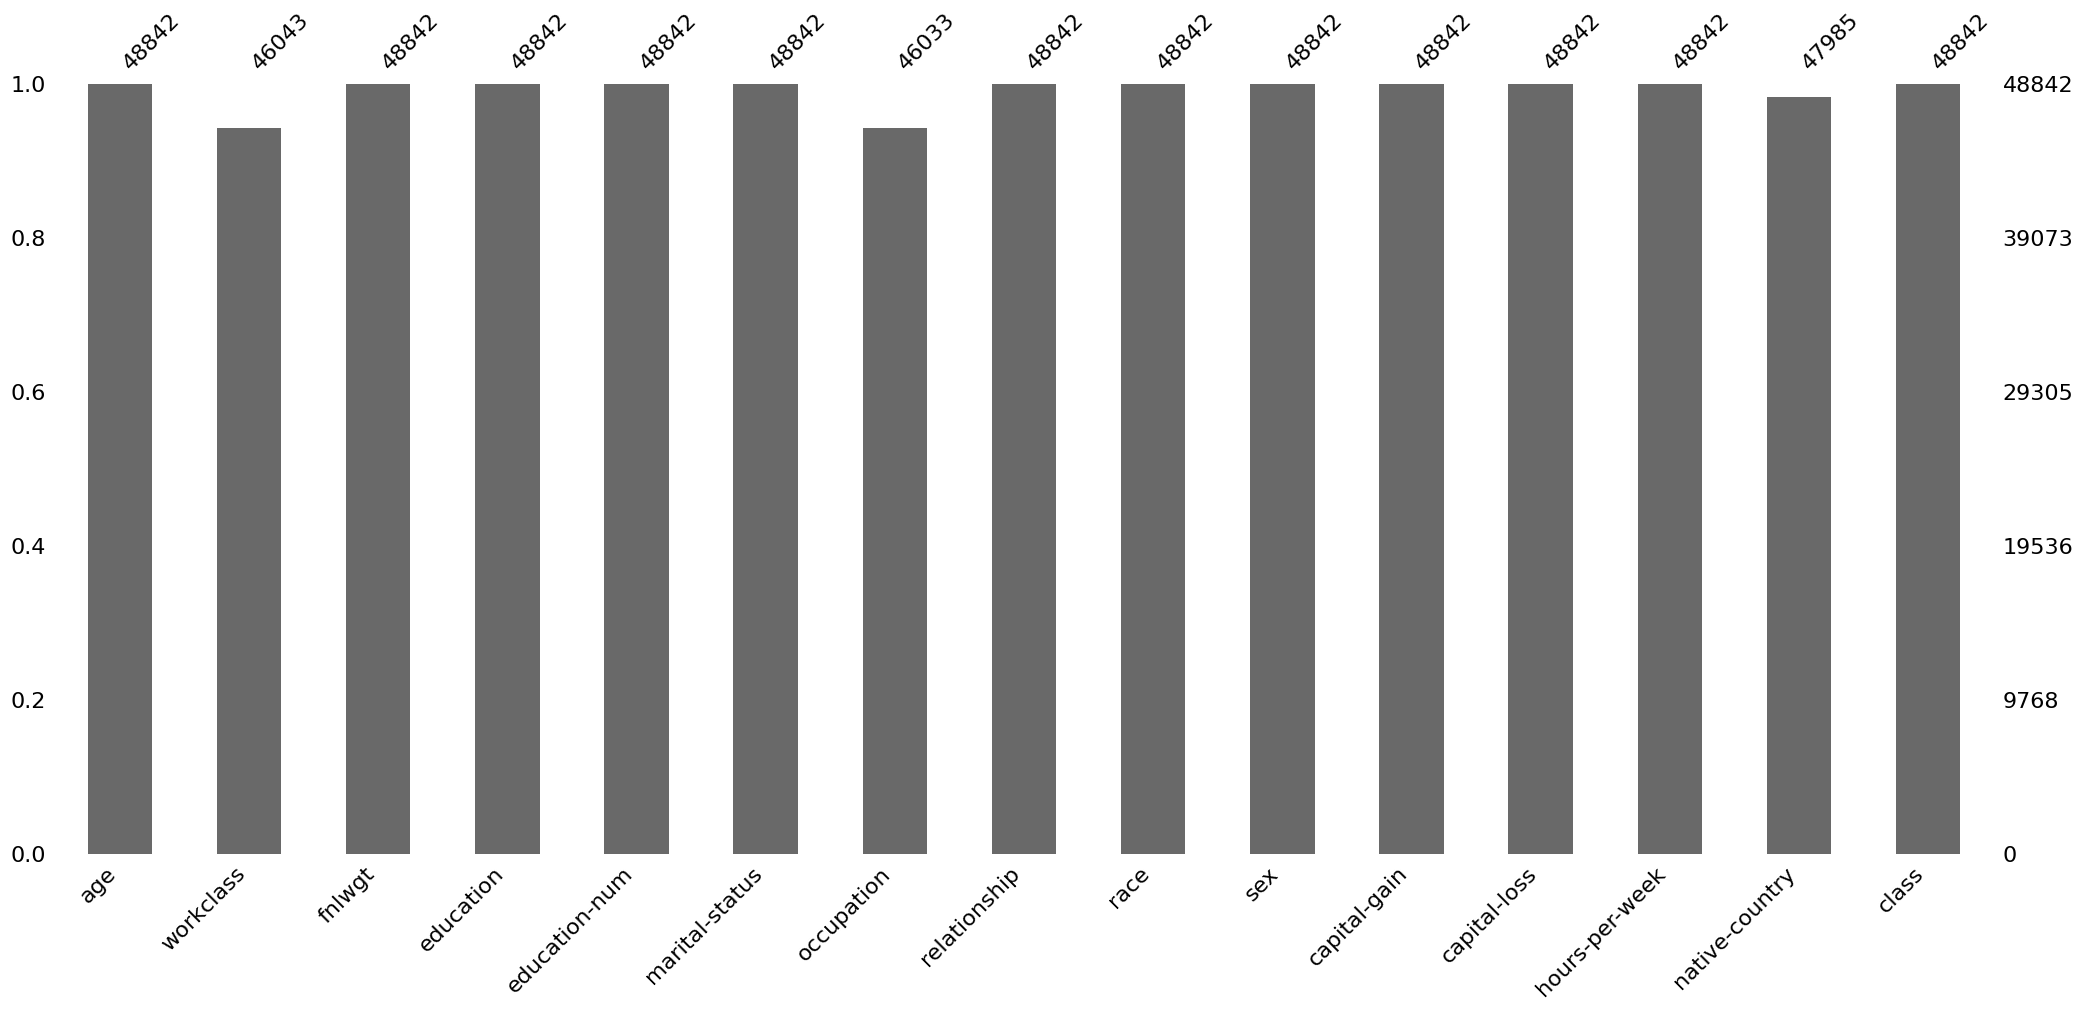

In [5]:
import missingno as msno
msno.bar(adult_df)

Jak widzimy, większość brakujących danych, to dane kategoryczne. Usuniemy wiersze je zawierające.

In [6]:
adult_df=adult_df.dropna()
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

Usuwamy również kolumnę "education" zostawiając "education-num", która niesie dla nas tę samą informację.

In [7]:
adult_df = adult_df.drop("education", axis=1)
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  class           45222 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


### Normalizacja danych liczbowych





Normalizujemy zmienne numeryczne. W przypadku klasyfikatorów RandomForest oraz ExtraTrees normalizacja danych nie jest wymagana, ponieważ te klasyfikatory radzą sobie z danymi nieznormalizowanymi. Mimo to, wykonanie normalizacji danych jest zalecane, ponieważ można w ten sposób przyspieszyć trenowanie modelu oraz nieznacznie zwiększyć dokładność uzyskanych wyników.


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ["age","fnlwgt","capital-gain","capital-loss","hours-per-week"]
adult_df[numeric_cols] = scaler.fit_transform(adult_df[numeric_cols])

In [9]:
adult_df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0.034201,State-gov,-1.062295,13,Never-married,Adm-clerical,Not-in-family,White,Male,0.142888,-0.21878,-0.078120,United-States,<=50K
1,0.866417,Self-emp-not-inc,-1.007438,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.146733,-0.21878,-2.326738,United-States,<=50K
2,-0.041455,Private,0.245284,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.146733,-0.21878,-0.078120,United-States,<=50K
3,1.093385,Private,0.425853,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.146733,-0.21878,-0.078120,United-States,<=50K
4,-0.798015,Private,1.407393,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.146733,-0.21878,-0.078120,Cuba,<=50K


Kodujemy teraz wartości nominalne poprzez one-hot-encoding

In [10]:
adult_df = pd.get_dummies(data=adult_df,columns=["workclass","education-num","marital-status","occupation","relationship","race","sex","native-country"])
adult_df.shape

(45222, 104)

In [11]:
adult_df["class"] = (adult_df["class"] == ">50K").astype(np.int8)

adult_df["class"].value_counts()

0    34014
1    11208
Name: class, dtype: int64

# Pomiary

In [23]:
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

def draw_importance_plot(df, rfc):
    important = zip(df.columns, rfc.feature_importances_)
    important = sorted(important, key=lambda x: x[1], reverse=True)
    print("Features in order of importance: ", important)
    plt.figure(figsize=(50, 20))
    plt.bar(df.drop("class", axis=1).columns, rfc.feature_importances_, color='maroon', width=0.4)
    plt.xticks(rotation=45)
    plt.show()
    
def draw_roc_curve(X_test, y_test, rfc):
    fpr, tpr, threshold = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(25, 15))
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

def rf_classify(est,df):
    e=df.sample(n=7000,random_state=42)
    X, y = e.drop('class', axis=1), e['class']

    # Define the hyperparameter grid to search over
    param_grid = {
        'n_estimators': [10, 50, 250, 500],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 3, 5],
        'min_samples_leaf': [1, 2]
    }
    scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

    # Define the inner and outer cross-validation folds
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # Define the grid search object
    grid_search = GridSearchCV(estimator=est,
                            param_grid=param_grid,
                            scoring=['accuracy','precision','recall'],
                            cv=inner_cv,
                            refit='accuracy',
                            n_jobs=-1)

    # Perform nested cross-validation
    nested_scores = cross_validate(grid_search, X=X, y=y, cv=outer_cv, scoring=scoring, n_jobs=7)
    print(f"Accuracy mean: {np.mean(nested_scores['test_accuracy'])} with std: {np.std(nested_scores['test_accuracy'])}")
    print(f"Precision mean: {np.mean(nested_scores['test_precision'])} with std: {np.std(nested_scores['test_precision'])}")
    print(f"Recall mean: {np.mean(nested_scores['test_recall'])} with std: {np.std(nested_scores['test_recall'])}")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    grid_search.fit(X_train,y_train)

    best_params=grid_search.best_params_
    train_acc = accuracy_score(y_true=y_train, y_pred=grid_search.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=grid_search.predict(X_test))

    print('Accuracy %.2f%% (average over CV test folds)' %
        (100 * grid_search.best_score_))
    print('Best Parameters: %s' % best_params)
    print('Training Accuracy: %.2f%%' % (100 * train_acc))
    print('Test Accuracy: %.2f%%' % (100 * test_acc))

    est.set_params(
        n_estimators=best_params["n_estimators"], 
        max_features=best_params["max_features"],
        min_samples_split=best_params["min_samples_split"],
        min_samples_leaf=best_params["min_samples_leaf"],
        random_state=42
    )

    est.fit(X_train, y_train)
    return est, X_test, y_test


# Klasyfikator RandomForest

 Klasyfikacja modelu i poszukiwanie najlepszych parametrów


In [24]:
rfc, X_test, y_test = rf_classify(RandomForestClassifier(), adult_df)


## Wykres ważności cech


Features in order of importance:  [('capital-gain', 0.1330822866049252), ('marital-status_Married-AF-spouse', 0.09954128541549227), ('age', 0.09634318357907296), ('hours-per-week', 0.07135835243200449), ('occupation_Transport-moving', 0.06859655032085782), ('fnlwgt', 0.058980341716875516), ('marital-status_Married-spouse-absent', 0.04014594374042875), ('occupation_Priv-house-serv', 0.03468440014797358), ('occupation_Craft-repair', 0.031724124298589305), ('capital-loss', 0.030205890763195773), ('education-num_12', 0.027188453394644794), ('education-num_13', 0.02556188713888507), ('race_White', 0.015410475813629787), ('education-num_14', 0.01520156018728841), ('sex_Female', 0.015189282928139388), ('occupation_Machine-op-inspct', 0.014198029795818367), ('relationship_Other-relative', 0.013608903210312582), ('education-num_8', 0.013373835961986425), ('relationship_Husband', 0.013248185948182507), ('relationship_Unmarried', 0.012694046975591997), ('education-num_9', 0.010261174544037695), (

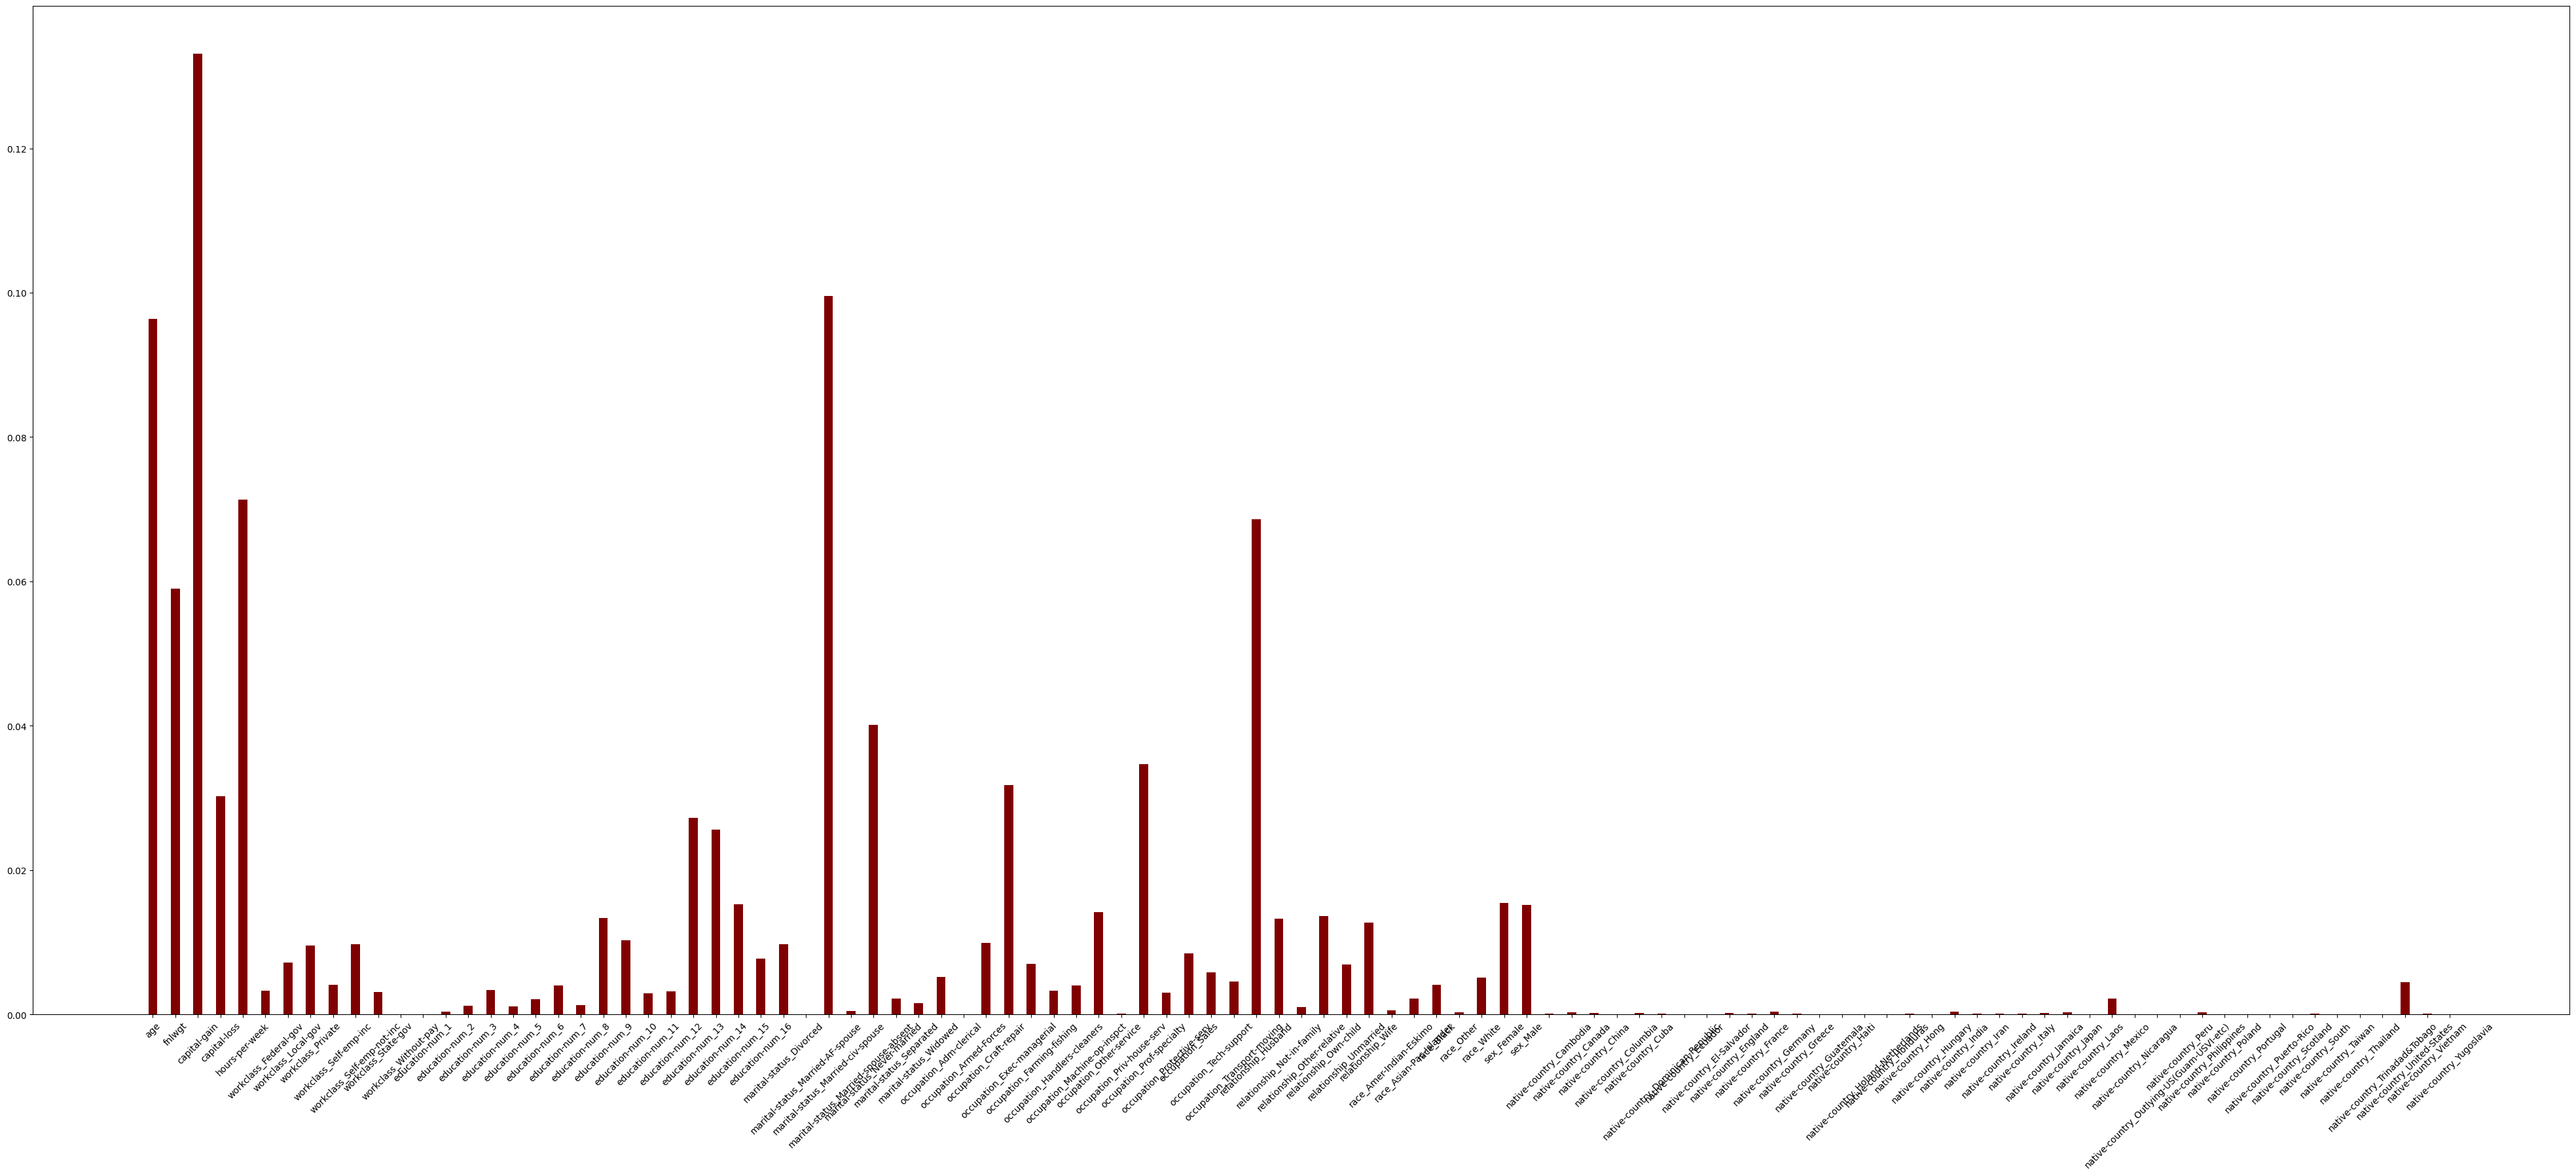

In [18]:
draw_importance_plot(adult_df, rfc)

## Wykres krzywej ROC

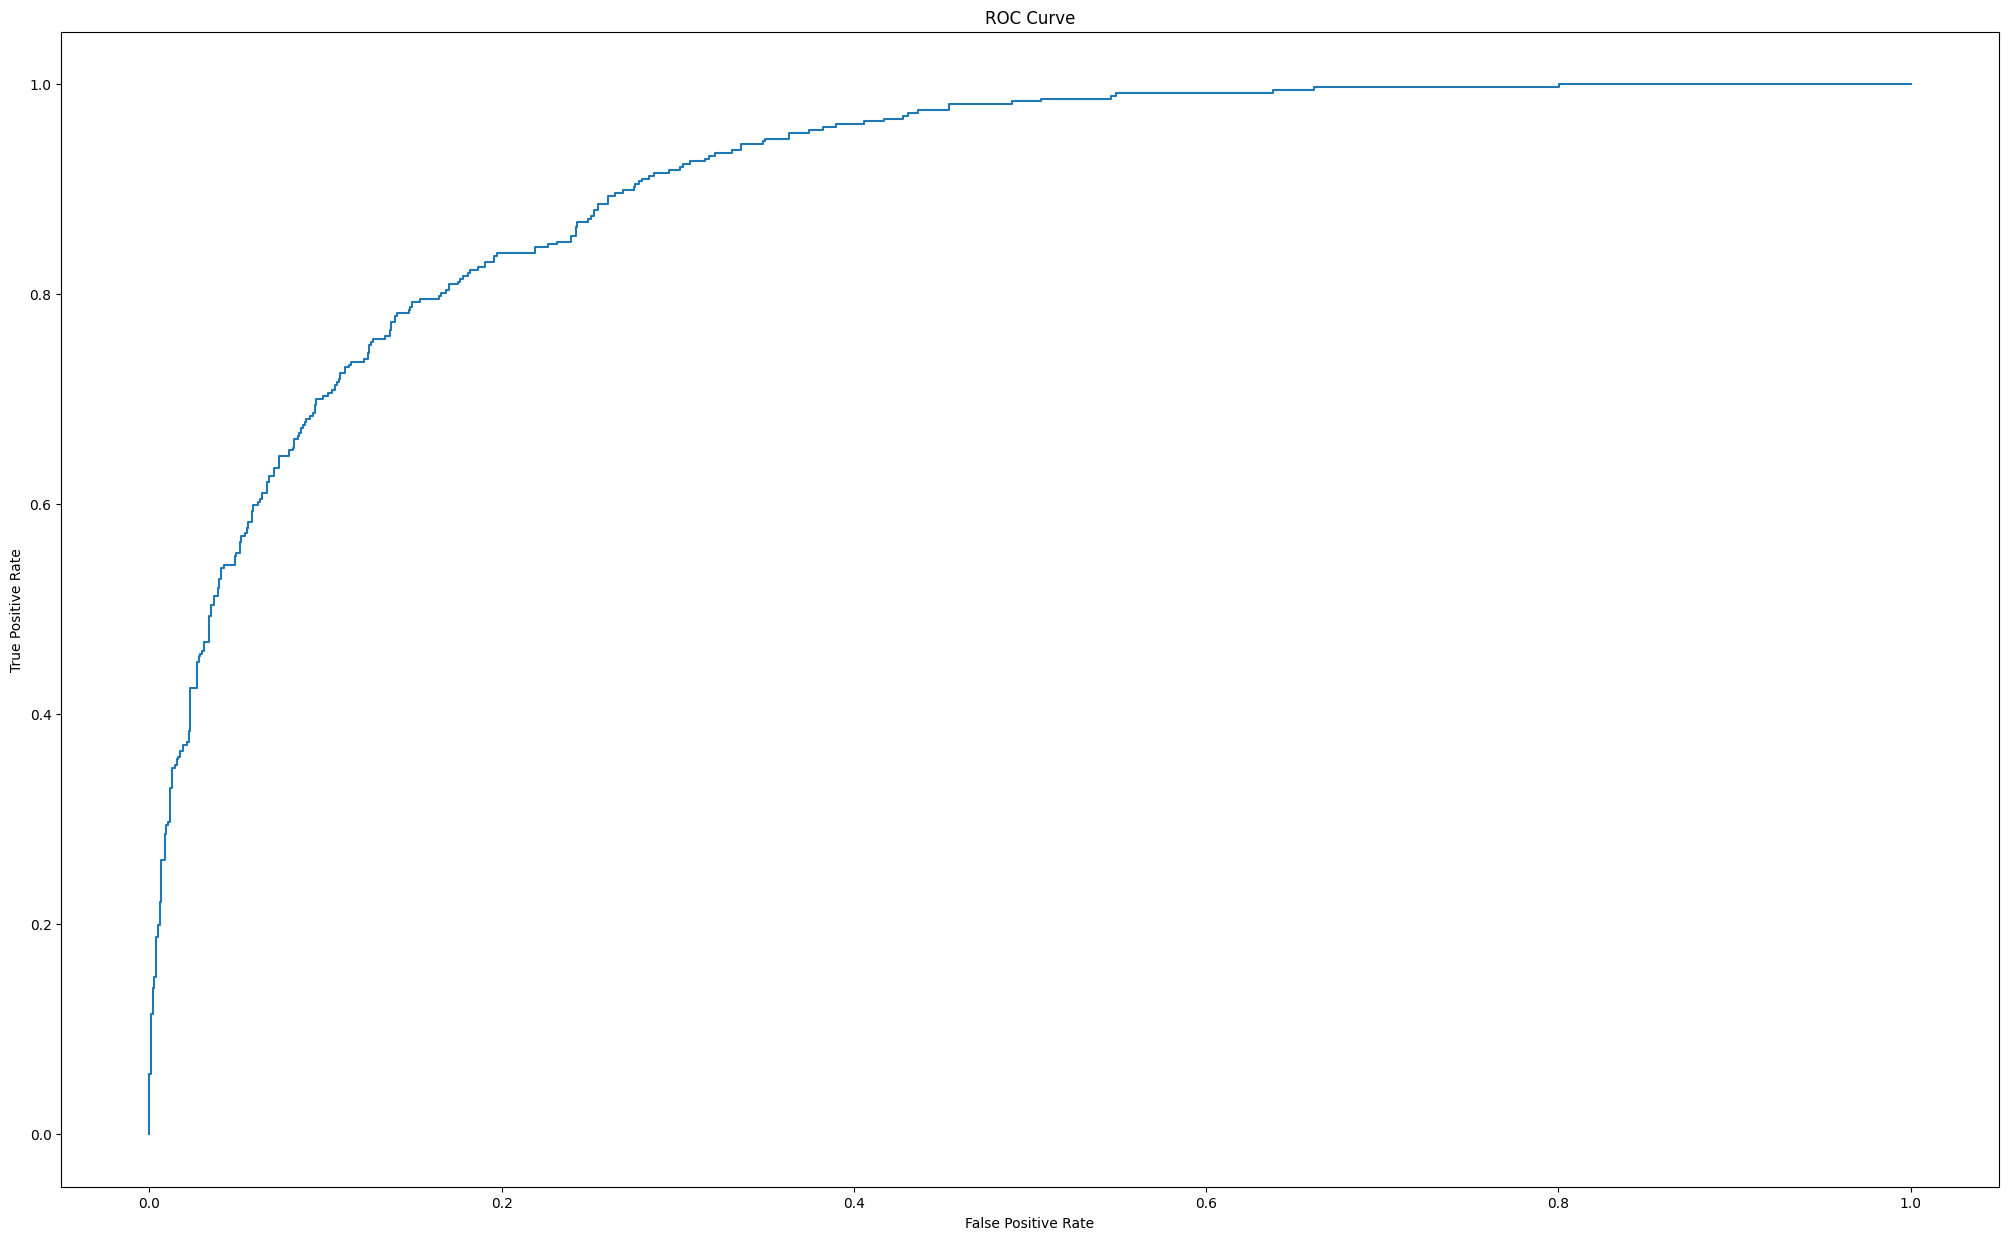

In [19]:
draw_roc_curve(X_test, y_test, rfc)

### Omówienie wyników dla RandomForstClassifier

Używając GridSearch oraz 5-krotnej walidacji krzyżowej poszukujemy najlepsych parametrów startowych oraz liczymy wartości unbiased accuracy, precsion i recall.

Po wyciągnięciu średniej wartości oraz odchylenia standardowego dostajemy:

- Accuracy mean: 85% with std: 0.013620213070346316
- Precision mean: 77% with std: 0.011500953002256087
- Recall mean: 61% with std: 0.027571819971565416

Najlepsze wyniki w stosunku do czasu wykonania uzyskujemy używając parametrów:

- n_estimators: 100
- max_features: sqrt
- min_samples_leaf: 2
- min_samples_split: 5


Trzema najważniejszymi cechami podczas uczenia okazały się:

- zysk kapitałowy ~14%
- status małżeński jako "współmażonek w siłach zbrojnych" ~12%
- wiek ~10%

Wyniki te pokrywają się z intuicją, że te cechy mają duży wpływ na przychód.

In [20]:
rfc, X_test, y_test = rf_classify(ExtraTreesClassifier(), adult_df)

Accuracy mean: 0.8391428571428572 with std: 0.014014569678206532
Precision mean: 0.7325659861738 with std: 0.015577582359859631
Recall mean: 0.5794710182927684 with std: 0.01901607471715549
{'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Finall accuracy 0.8285714285714286


Features in order of importance:  [('marital-status_Married-AF-spouse', 0.13093793318577018), ('occupation_Transport-moving', 0.0966770541927634), ('marital-status_Married-spouse-absent', 0.0693901750187911), ('capital-gain', 0.06604200374892291), ('occupation_Priv-house-serv', 0.04726099901463681), ('occupation_Craft-repair', 0.042325455164068986), ('education-num_12', 0.04140152755276613), ('education-num_13', 0.03733054681549846), ('age', 0.033167558831102326), ('hours-per-week', 0.028522381311432497), ('education-num_14', 0.023667657897376758), ('relationship_Husband', 0.023019937815432906), ('sex_Female', 0.021516068816139725), ('occupation_Machine-op-inspct', 0.019395990138037295), ('relationship_Unmarried', 0.018519329813296955), ('capital-loss', 0.018286540807833804), ('education-num_8', 0.017982356639828743), ('race_White', 0.017584670840199525), ('relationship_Other-relative', 0.014255197987778172), ('fnlwgt', 0.013778690654331256), ('education-num_15', 0.013577024035783689),

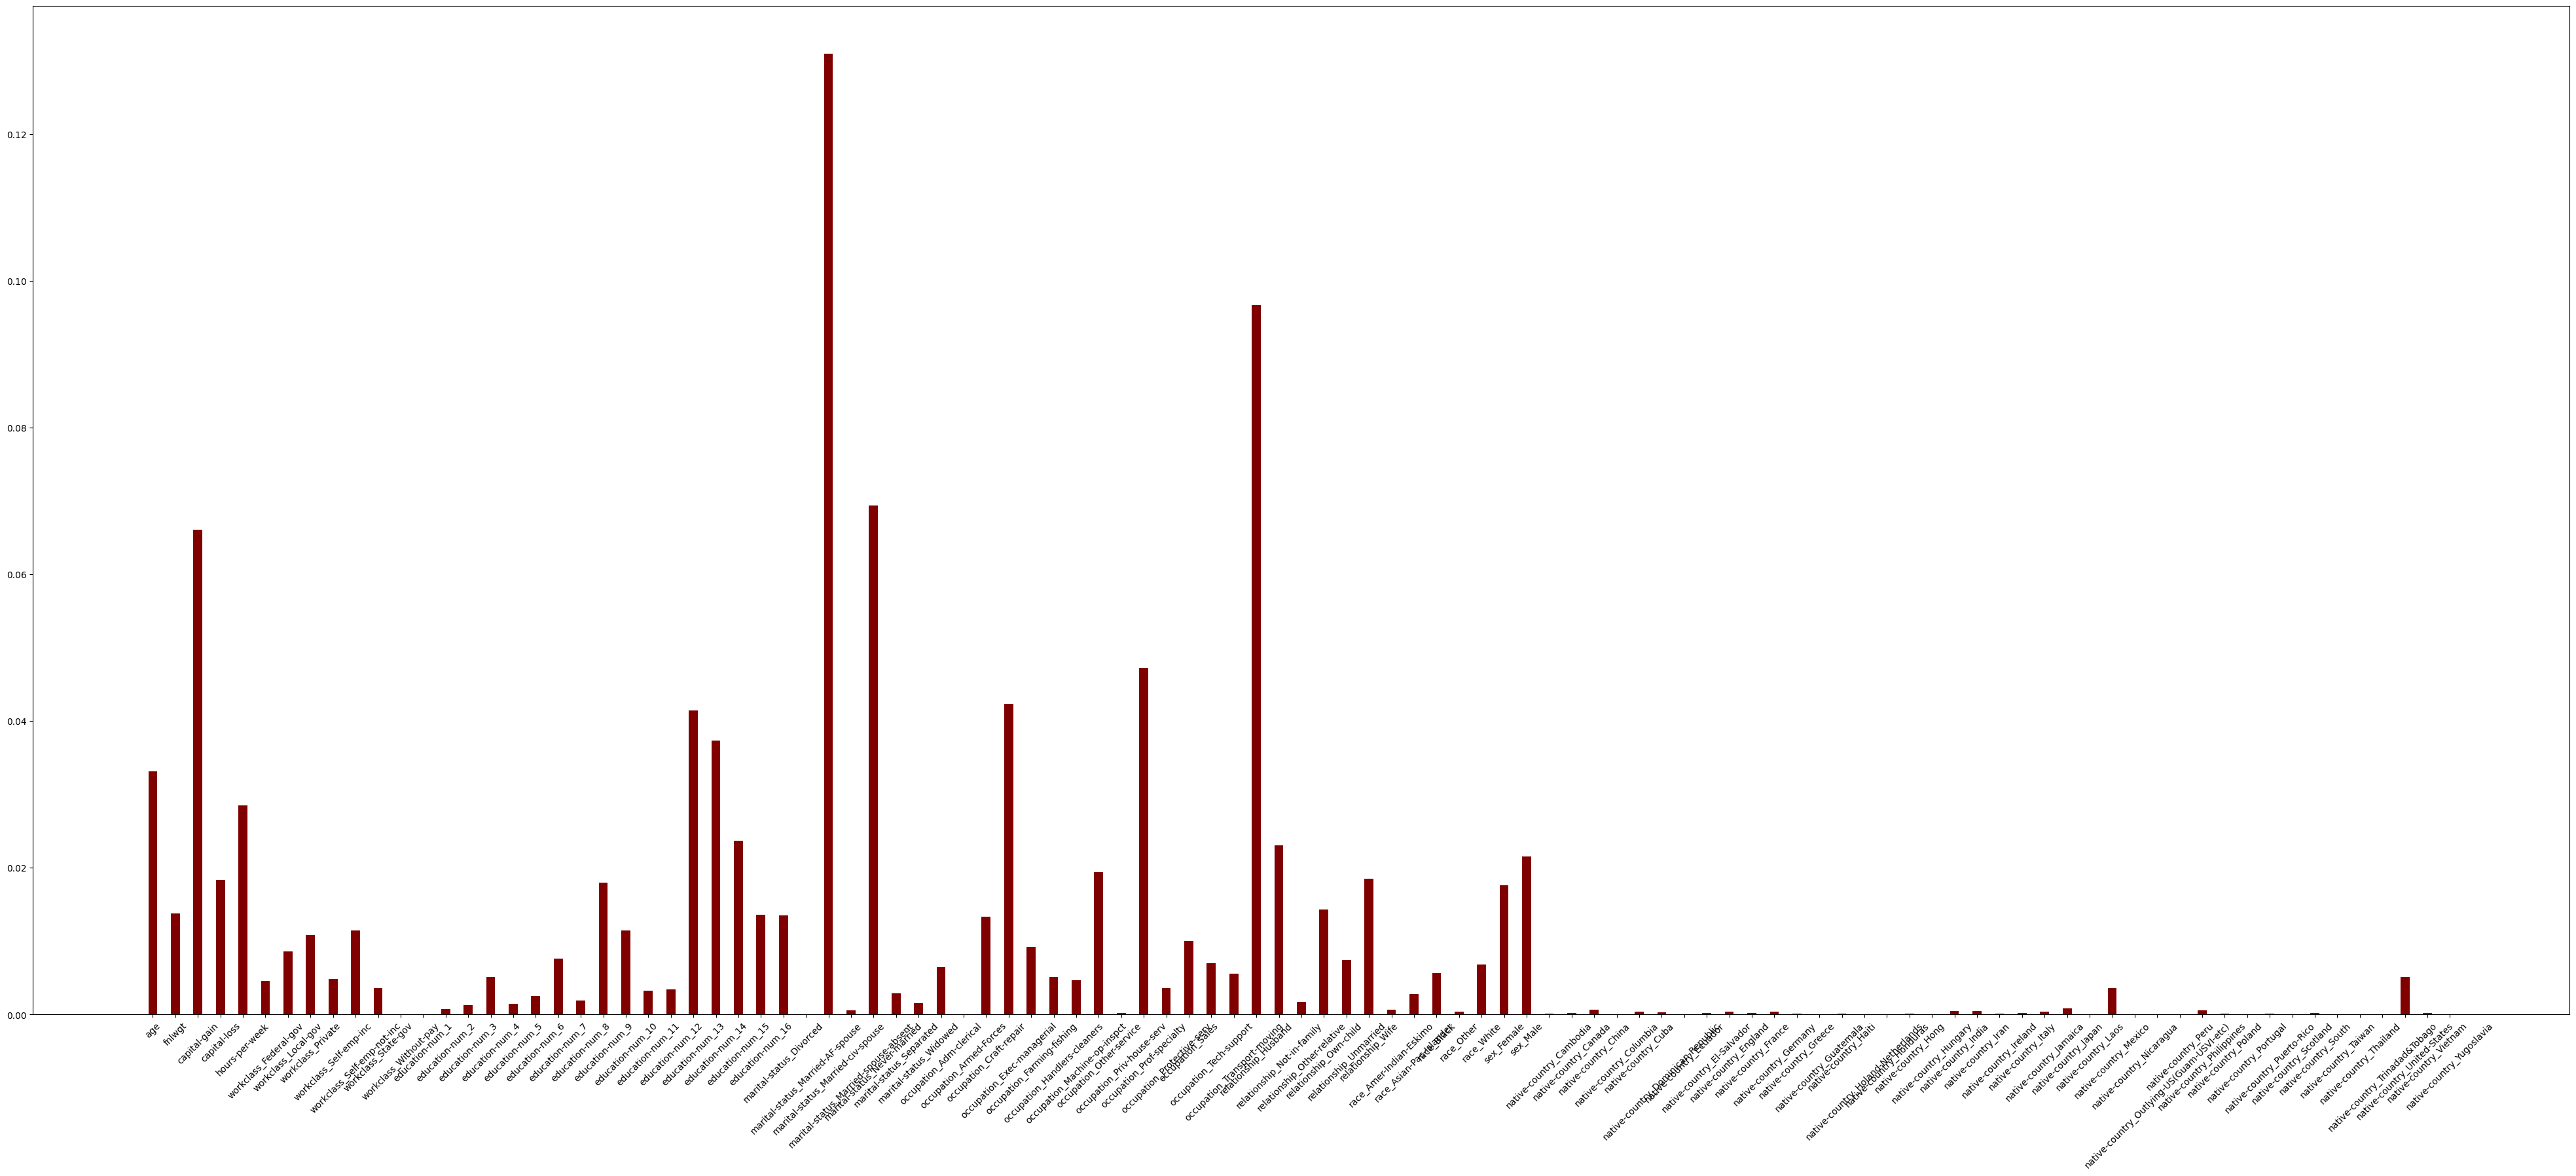

In [21]:
draw_importance_plot(adult_df, rfc)

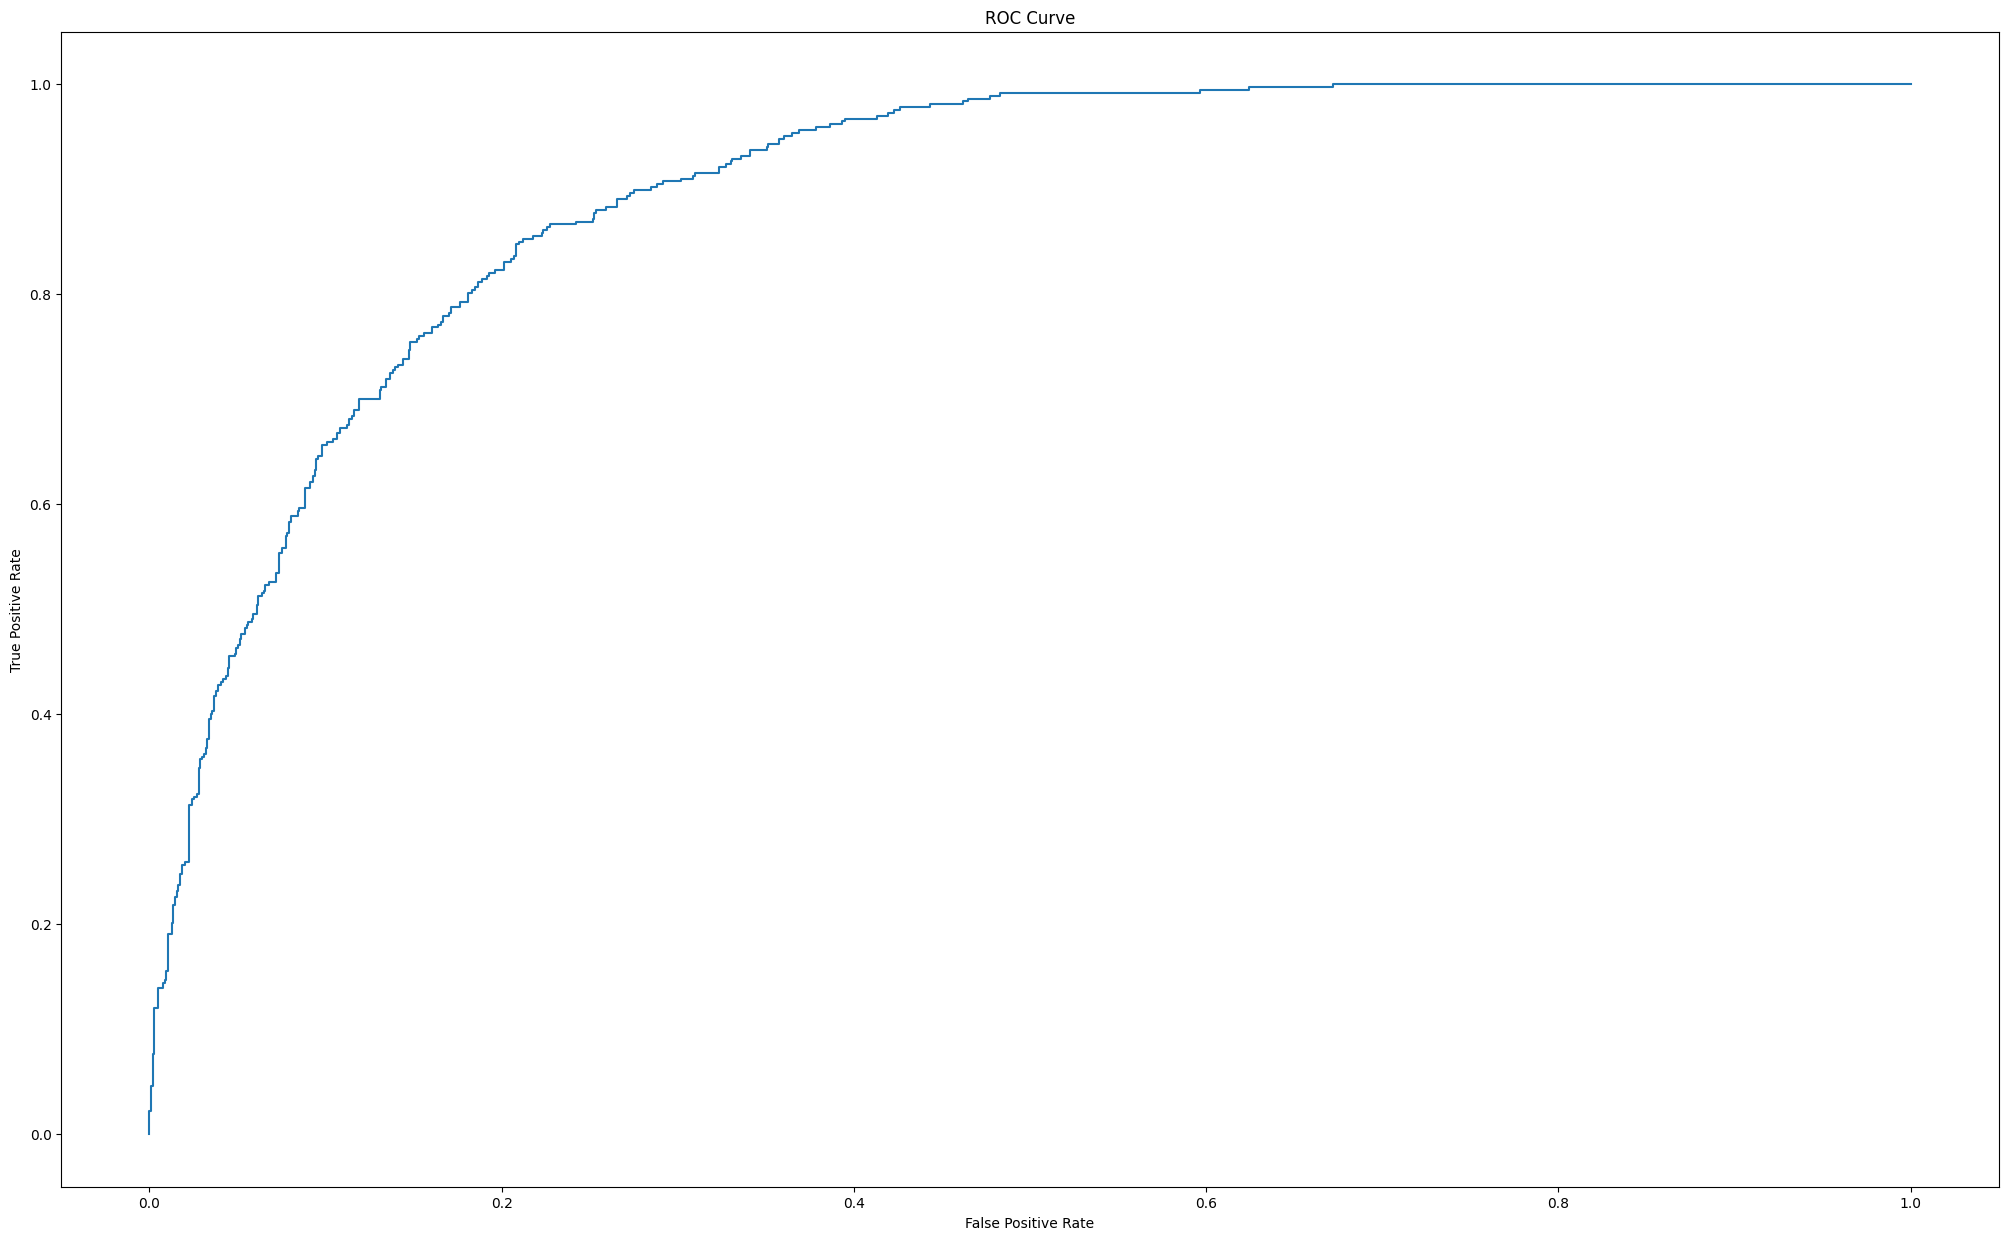

In [22]:
draw_roc_curve(X_test, y_test, rfc)

# Wnioski

- Czy klasyfikatory były czułe na rozważane parametry?

    Tak, były czułe, w szczegolności na parametr "n_estimators". Zazwyczaj czym większa ich ilość, tym lepsze wyniki, ale zysk z ich zwiększania może czasem być nieproporcjonalny do wydłużenia czasu obliczeń, dlatego warto badać ten parametr w szerokim zakresie, by dobrać najlepszą opcję.

- Czy skutecznosc oszacowana na etapie walidacji była zgodna ze skutecznoscia
ustalona na etapie testowania?

    Tak, skuteczności są bardzo zbliżone do siebie, co oznacza, że przy procesie walidacji uzyskaliśmy właściwą predykcję zachowania późniejszego modelu.

- Czy istnieje wyraźne powiazanie miedzy uzytmi cechami, a wynikiem predykcji?

    